# Projeto de Técnicas de Programação I
#### EQUIPE
* Camila de Jesus
* Janaina Oliveira
* Pedro Pilon
* Ricardo Jeferson da Silva Francisco
* Tamires Torres

#### CONTEXTUALIZAÇÃO

Você trabalha em uma consultoria de dados que foi contratada para realizar a distribuição de materiais didáticos nas escolas da cidade do Rio de Janeiro. Sua missão é realizar tratamentos nos dados de acordo com as normas de padrão definidas pelo cliente e encontrar qual a melhor rota que um caminhão deve realizar para entregar os materiais didáticos de forma a otimizar o seu percurso. 

Para esse projeto você recebeu três arquivos:
- escolas.csv: contém os dados das escolas
- subprefeituras.csv: contém dados de quais bairros pertem a cada subprefeitura
- material_didatico.csv: contém a quantidade de material didático que cada escola deve receber

Como produto final, você deve entregar:
- um arquivo csv no as linhas já estarão ordenas de acordo com a rota a ser seguida. Além disso, os dados devem estar no padrão especificado abaixo e contendo as seguintes colunas: id da escola, nome da escola, tipo da escola (EM, CIEP ou colégio), logradouro da entrega, número, bairro, subprefeitura, latitude, longitude e quantidade de material didático que deve ser entregue. O logradouro da escola deve estar em uma coluna diferente do número;
- um arquivo csv com a quantidade total de material escolar por subprefeitura para que sejam contabilizados os custos por subprefeitura

#### ATIVIDADES
Como padrão dos dados, considere:
- nome das colunas em snake_case
- strings não devem conter acentos
- todas as strings devem estar em maiúsculo
- padronização do nome dos logradouros sem abreviação (Ex: R. deve estar como Rua)
- latitude e longitude devem conter apenas 5 casas decimais
- os ids da escola devem todos ser strings com 3 caracteres (Ex: '024')

#### DESAFIO:

Entregar um plot com a representação da melhor rota que você encontrou, por exemplo:
<img src="rota.png"  width="70%" height="40%">

Obs: O otimizador não é a parte mais importante do projeto. Foque no tratamento dos dados e se preciso, pode reduzir a quantidade de escolas para rodar o otimizador.

1. Importando as bibliotecas

In [1]:
import math
import pandas as pd
import numpy as np

C:\Users\cami1\AppData\Local\Temp\ipykernel_18168\606370418.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


2. Importando os CSV

In [2]:
escolas = pd.read_csv("escolas.csv")
material_didatico = pd.read_csv("material_didatico.csv")
subprefeituras = pd.read_csv("subprefeituras.csv")

3. Tratamento dos dados: nome das colunas em snake_case

* ESCOLAS

In [3]:
# Visualizando os dados iniciais
escolas.head(2)

,id,Escolas_Postos,BAIRRO,ENDEREÇO,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"


In [4]:
# Convertendo os nomes das colunas para minúsculas
escolas.columns = escolas.columns.str.lower()

escolas.head(2)

,id,escolas_postos,bairro,endereço,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"


In [5]:
# Trocando 'ç' por 'c' nos nomes das colunas
snake_case_coluna = {coluna: coluna.replace('ç', 'c') for coluna in escolas.columns}
escolas.rename(columns=snake_case_coluna, inplace=True)

escolas.head(2)

,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"


In [6]:
# Adequar nome dos bairros - No caso apnas o FREGuesia (Jacarepagua está abreviado, 
# e será colocado por extenso para equivaler ao mesmo em subprefeituras)
escolas.loc[100, 'bairro']

'FREGUESIA JPA'

In [7]:
escolas.loc[100, 'bairro'] = 'FREGUESIA (JACAREPAGUA)'

In [8]:
# remover o espaço extra no nome da coluna endereco

escolas.rename (columns= {'endereco ': 'endereco'}, inplace = True)

* MATERIAL DIDÁTICO

In [9]:
# Visualizando os dados iniciais
material_didatico.head(2)

,id,Quantidade
0,178,20
1,634,121


In [10]:
# Convertendo os nomes das colunas para minúsculas
material_didatico.columns = material_didatico.columns.str.lower()

material_didatico.head(2)

,id,quantidade
0,178,20
1,634,121


In [11]:
#Converter a força os valores stringficados em Quantidades, se houverem
coluna_convertida = pd.to_numeric(material_didatico['quantidade'], errors='coerce')
linhas_nao_numericas = material_didatico[coluna_convertida.isna()]
linhas_nao_numericas 

,id,quantidade
14,413,''
31,60,'NaN'
38,429,NaN
67,260,'397'
76,91,'NaN'
85,412,'395'
99,492,NaN
117,687,NaN
140,297,' '
148,215,NaN


In [12]:
# converter as linhas 67 e 85 para valores numericos
material_didatico.loc[85, 'quantidade'] = 395
material_didatico.loc[67, 'quantidade'] = 397

# Confiorma novamente os nao numericos
coluna_convertida = pd.to_numeric(material_didatico['quantidade'], errors='coerce')
linhas_nao_numericas = material_didatico[coluna_convertida.isna()]
linhas_nao_numericas 

,id,quantidade
14,413,''
31,60,'NaN'
38,429,NaN
76,91,'NaN'
99,492,NaN
117,687,NaN
140,297,' '
148,215,NaN


In [13]:
#Remover valores nulos da tabela materiais
Nulos = [14, 31, 38, 76, 99, 117, 140, 148]
material_didatico.drop(Nulos, inplace=True)
material_didatico

,id,quantidade
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67
...,...,...
145,210,570
146,474,320
147,301,335
149,606,521


In [14]:
#Aplicando as regras solicitasdas a coluna id
# converte pra int, depois pra str e depois preenche o zxero faltaten com zfill
material_didatico['id'] = material_didatico['id'].astype(int).astype(str).apply(lambda x: x.zfill(3))
material_didatico

,id,quantidade
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67
...,...,...
145,210,570
146,474,320
147,301,335
149,606,521


* SUBPREFEITURAS

In [15]:
# Visualizando os dados iniciais
subprefeituras.head(2)

,nome,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro


4. Tratamento dos dados: strings não devem conter acentos


5. Tratamento dos dados: todas as strings devem estar em maiúsculo

In [16]:
# conversão das colunas para strings
subprefeituras['nome'] = subprefeituras['nome'].astype(str)
subprefeituras['subprefeitura'] = subprefeituras['subprefeitura'].astype(str)

#Conversão para caixa alta
subprefeituras['nome'] = subprefeituras['nome'].str.upper()
subprefeituras['subprefeitura'] = subprefeituras['subprefeitura'].str.upper()

subprefeituras


,nome,subprefeitura
0,SANTO CRISTO,CENTRO
1,GAMBOA,CENTRO
2,SAÚDE,CENTRO
3,CAJU,CENTRO
4,CENTRO,CENTRO
...,...,...
159,SANTA CRUZ,ZONA OESTE
160,GUARATIBA,ZONA OESTE
161,BARRA DE GUARATIBA,ZONA OESTE
162,PEDRA DE GUARATIBA,ZONA OESTE


6. Tratamento dos dados: padronização do nome dos logradouros sem abreviação (Ex: R. deve estar como Rua)

In [17]:
# Remover abreviações nos endereços
# substituir R. por Rua, Av. por Avenida, Sen. por Senador, Mal. para Marechal, Alm. para Almirante, 
# Pca, para Praca, Eng para Enenheiro, Estr. para Estrada e Sd para Soldado
substituicoes = {
    'R.': 'Rua',
    'Ruaa': 'Rua',
    'Av.': 'Avenida ',
    'Avenidanida': 'Avenida',
    'Sen.': 'Senador',
    'Mal.': 'Marechal',
    'Alm.': 'Almirante',
    'Pca': 'Praca',
    'Eng': 'Engenheiro',
    'Estr.': 'Estrada',
    'Sd': 'Soldado'
}

escolas['endereco'] = escolas['endereco'].replace(substituicoes, regex=True)

substituicoes2 = {
    'Ruaa': 'Rua',
    'Avenidanida': 'Avenida',
    'Avenida nida': 'Avenida',
    'Estradada': 'Estrada',
    'Praca.' : 'Praca',
    'Rua Ruasa': 'Rua',
    'de Almiranteida': 'do Almirante',
    's/n°': 'sem numero',
    's/no': 'sem numero',
    's/n.o': 'sem numero'
}

escolas['endereco'] = escolas['endereco'].replace(substituicoes2, regex=True)


escolas

,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"Rua do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
...,...,...,...,...,...,...
147,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,Estrada Do Magarça 9.183,"-22,98046","-43,643545"
148,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/Nº","-22,953163","-43,577409"
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.º,"-23,009084","-43,537582"
150,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,Caminho da Matriz 4406,"-22,994124","-43,593683"


7. Tratamento dos dados: latitude e longitude devem conter apenas 5 casas decimais

In [18]:
# Normalizando valores em latitude e longituide
escolas['lat'] = pd.to_numeric(escolas['lat'].str.replace(',', '.'), errors='coerce')
escolas['lon'] = pd.to_numeric(escolas['lon'].str.replace(',', '.'), errors='coerce')
escolas['lat'] = escolas['lat'] = escolas['lat'].astype(float).apply(lambda x: '{:.5f}'.format(x))
escolas['lon'] = escolas['lon'] = escolas['lon'].astype(float).apply(lambda x: '{:.5f}'.format(x))

escolas


,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,-22.88089,-43.22533
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,-22.88957,-43.23620
2,483,EM CELESTINO SILVA,CENTRO,"Rua do Lavradio, 56",-22.90929,-43.18358
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,-22.89763,-43.22746
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,-22.92441,-43.20858
...,...,...,...,...,...,...
147,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,Estrada Do Magarça 9.183,-22.98046,-43.64355
148,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/Nº",-22.95316,-43.57741
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.º,-23.00908,-43.53758
150,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,Caminho da Matriz 4406,-22.99412,-43.59368


8. Tratamento dos dados: os ids da escola devem todos ser strings com 3 caracteres (Ex: '024')

In [19]:
#Aplicando as regras solicitasdas a coluna id
# converte pra int, depois pra str e depois preenche o zxero faltaten com zfill
escolas['id'] = escolas['id'].astype(int).astype(str).apply(lambda x: x.zfill(3))

escolas


,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,-22.88089,-43.22533
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,-22.88957,-43.23620
2,483,EM CELESTINO SILVA,CENTRO,"Rua do Lavradio, 56",-22.90929,-43.18358
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,-22.89763,-43.22746
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,-22.92441,-43.20858
...,...,...,...,...,...,...
147,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,Estrada Do Magarça 9.183,-22.98046,-43.64355
148,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/Nº",-22.95316,-43.57741
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.º,-23.00908,-43.53758
150,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,Caminho da Matriz 4406,-22.99412,-43.59368


In [20]:
ids_duplicadas = escolas.groupby('id').filter(lambda x: len(x) > 1)
ids_duplicadas

,id,escolas_postos,bairro,endereco,lat,lon
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"Rua Barão da Torre, 90",-22.98333,-43.19904
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"Rua Haddock Lobo, 148",-22.91723,-43.21104
14,413,EM CÓCIO BARCELOS,COPACABANA,"Rua Barão de Ipanema, 34",-22.97483,-43.18906
15,413,EM CÓCIO BARCELOS,COPACABANA,"Rua Barão de Ipanema, 34",-22.74828,-43.18906
20,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"Rua Barão da Torre, 90",-22.98333,-43.19904
25,089,EM MARIO CLAUDIO,RIO COMPRIDO,"Rua Haddock Lobo, 148",-22.91723,-43.21104
34,660,E.M NOSSA SENHORA DA POMPÉIA,TODOS OS SANTOS,"Rua Cirne Maia, 109",-22.89203,-43.27992
40,660,E.M NOSSA SENHORA DA POMPÉIA,TODOS OS SANTOS,"Rua Cirne Maia, 109",-22.89203,-43.27992
49,388,EM CARDEAL CAMARA,PARADA DE LUCAS,"Rua Anamá, 98",-22.81527,-43.30357
56,379,CIEP NELSON MANDELA,CAMPO GRANDE,"Praça Daniel Lames, S/N",-22.89558,-43.57051


### Temos
escolas_duplcadas
id17: [5, 20],
id69: [69, 80, 135, 143, 151],
id89: [9, 25, 57, 84],
id90: [70, 78],
id206: [99, 117],
id379: [56, 112, 123],
id388: [49, 60],
id413: [14, 15],
id520: [85, 109],
id660: [34, 40],
    

In [21]:
duplicados = [20, 80, 135, 143, 151, 25, 57, 84, 78, 117, 112, 123, 60, 15, 109, 40]
escolas.drop(duplicados, inplace=True)
escolas

,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,-22.88089,-43.22533
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,-22.88957,-43.23620
2,483,EM CELESTINO SILVA,CENTRO,"Rua do Lavradio, 56",-22.90929,-43.18358
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,-22.89763,-43.22746
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,-22.92441,-43.20858
...,...,...,...,...,...,...
146,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,Rua Belchior Da Fonseca 643,-23.00142,-43.63876
147,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,Estrada Do Magarça 9.183,-22.98046,-43.64355
148,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/Nº",-22.95316,-43.57741
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.º,-23.00908,-43.53758


In [22]:
# Renomear a coluna 'nome' para 'bairro'
subprefeituras = subprefeituras.rename(columns={'nome': 'bairro'})

In [23]:
# Juntar os dados das escolas com as subprefeituras
escolas = pd.merge(escolas, subprefeituras, how='left', on='bairro')
escolas

,id,escolas_postos,bairro,endereco,lat,lon,subprefeitura
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,-22.88089,-43.22533,CENTRO
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,-22.88957,-43.23620,CENTRO
2,483,EM CELESTINO SILVA,CENTRO,"Rua do Lavradio, 56",-22.90929,-43.18358,CENTRO
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,-22.89763,-43.22746,CENTRO
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,-22.92441,-43.20858,CENTRO
...,...,...,...,...,...,...,...
131,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,Rua Belchior Da Fonseca 643,-23.00142,-43.63876,ZONA OESTE
132,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,Estrada Do Magarça 9.183,-22.98046,-43.64355,ZONA OESTE
133,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/Nº",-22.95316,-43.57741,ZONA OESTE
134,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.º,-23.00908,-43.53758,ZONA OESTE


In [24]:
# Juntar  escolas e material didático
dados_finais = pd.merge(escolas, material_didatico, how='left', on='id')

In [25]:
dados_finais

,id,escolas_postos,bairro,endereco,lat,lon,subprefeitura,quantidade
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,-22.88089,-43.22533,CENTRO,20
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,-22.88957,-43.23620,CENTRO,121
2,483,EM CELESTINO SILVA,CENTRO,"Rua do Lavradio, 56",-22.90929,-43.18358,CENTRO,220
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,-22.89763,-43.22746,CENTRO,190
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,-22.92441,-43.20858,CENTRO,67
...,...,...,...,...,...,...,...,...
131,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,Rua Belchior Da Fonseca 643,-23.00142,-43.63876,ZONA OESTE,570
132,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,Estrada Do Magarça 9.183,-22.98046,-43.64355,ZONA OESTE,320
133,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/Nº",-22.95316,-43.57741,ZONA OESTE,335
134,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.º,-23.00908,-43.53758,ZONA OESTE,NaN


In [26]:
# Remover acentos e padronizar strings
from unidecode import unidecode


def remover_acentos(texto):
    return unidecode(texto)


dados_finais['escolas_postos'] = dados_finais['escolas_postos'].apply(remover_acentos)
dados_finais['bairro'] = dados_finais['bairro'].apply(remover_acentos)
dados_finais['endereco'] = dados_finais['endereco'].apply(remover_acentos)

dados_finais

,id,escolas_postos,bairro,endereco,lat,lon,subprefeitura,quantidade
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,Rua Carlos Seidl S/No,-22.88089,-43.22533,CENTRO,20
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ebano 187,-22.88957,-43.23620,CENTRO,121
2,483,EM CELESTINO SILVA,CENTRO,"Rua do Lavradio, 56",-22.90929,-43.18358,CENTRO,220
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,Praca Argentina 20,-22.89763,-43.22746,CENTRO,190
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praca Condessa Paulo de Frontin 45,-22.92441,-43.20858,CENTRO,67
...,...,...,...,...,...,...,...,...
131,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,Rua Belchior Da Fonseca 643,-23.00142,-43.63876,ZONA OESTE,570
132,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,Estrada Do Magarca 9.183,-22.98046,-43.64355,ZONA OESTE,320
133,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/No",-22.95316,-43.57741,ZONA OESTE,335
134,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.o,-23.00908,-43.53758,ZONA OESTE,NaN


In [27]:
dados_finais['endereco'] = dados_finais['endereco'].str.upper()
dados_finais

,id,escolas_postos,bairro,endereco,lat,lon,subprefeitura,quantidade
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/NO,-22.88089,-43.22533,CENTRO,20
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,-22.88957,-43.23620,CENTRO,121
2,483,EM CELESTINO SILVA,CENTRO,"RUA DO LAVRADIO, 56",-22.90929,-43.18358,CENTRO,220
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,-22.89763,-43.22746,CENTRO,190
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,-22.92441,-43.20858,CENTRO,67
...,...,...,...,...,...,...,...,...
131,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA 643,-23.00142,-43.63876,ZONA OESTE,570
132,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA 9.183,-22.98046,-43.64355,ZONA OESTE,320
133,301,EM JONATAS SERRANO,GUARATIBA,"ESTRADA DO MATO ALTO, S/NO",-22.95316,-43.57741,ZONA OESTE,335
134,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO S/N.O,-23.00908,-43.53758,ZONA OESTE,NaN


In [29]:
print(dados_finais.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              136 non-null    object
 1   escolas_postos  136 non-null    object
 2   bairro          136 non-null    object
 3   endereco        136 non-null    object
 4   lat             136 non-null    object
 5   lon             136 non-null    object
 6   subprefeitura   118 non-null    object
 7   quantidade      128 non-null    object
dtypes: object(8)
memory usage: 8.6+ KB
None


In [30]:
dados_finais['quantidade'] = pd.to_numeric(dados_finais['quantidade'], errors='coerce')

In [31]:
total_subprefeitura = dados_finais.groupby('subprefeitura')['quantidade'].sum().reset_index()

In [33]:
total_subprefeitura

,subprefeitura,quantidade
0,BARRA DA TIJUCA,215.0
1,CENTRO,2352.0
2,GRANDE BANGU,3979.0
3,GRANDE TIJUCA,2125.0
4,ILHAS,741.0
5,JACAREPAGUÁ,1961.0
6,ZONA NORTE,12455.0
7,ZONA OESTE,6613.0
8,ZONA SUL,3800.0


In [35]:
dados_finais.to_csv('dados_finais.csv', index=False)

In [36]:
#Ordenar os dados
# bibliotecas necessárias do ortools para resolver o Vehicle Routing Problem (VRP)
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# biblioteca math para funções matemáticas
import math

# Função para calcular a distância entre dois pontos usando a fórmula de Haversine
def haversine(lat1, lon1, lat2, lon2):
    # Raio médio da Terra em quilômetros
    R = 6371  
    
    # Calcular as diferenças de latitude e longitude em radianos
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    
    # Calcular a fórmula de Haversine para obter a distância entre os pontos
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    
    return distance

# Função para resolver o Vehicle Routing Problem usando ortools
def solve_vrp(data):
    # Criar um gerenciador de índices para o VRP
    manager = pywrapcp.RoutingIndexManager(len(data['locations']), data['num_vehicles'], data['depot'])
    
    # Criar um modelo de roteamento
    routing = pywrapcp.RoutingModel(manager)

    # Definir a função de distância entre dois pontos (usando a função haversine)
    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return haversine(data['locations'][from_node][0], data['locations'][from_node][1],
                         data['locations'][to_node][0], data['locations'][to_node][1])

    # Registrar a função de distância como um callback no modelo de roteamento
    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Configurar o modelo de roteamento para usar a função de distância como custo entre os arcos
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Configurar parâmetros de pesquisa para o algoritmo de otimização
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.time_limit.seconds = 30

    # Resolver o VRP
    solution = routing.SolveWithParameters(search_parameters)

    # Se uma solução foi encontrada, obter a ordem dos nós na rota
    if solution:
        index = routing.Start(0)
        route = []
        while not routing.IsEnd(index):
            route.append(manager.IndexToNode(index))
            index = solution.Value(routing.NextVar(index))
        return route
    else:
        return None

# Seus dados
dados_finais = pd.read_csv('dados_finais.csv')

# Preparar dados para ortools
data = {
    'locations': list(zip(dados_finais['lat'], dados_finais['lon'])),
    'num_vehicles': 1,
    'depot': 0  # O ponto inicial (depot) é o primeiro ponto na lista de locais
}

# Resolver o Vehicle Routing Problem (VRP)
rota_otimizada = solve_vrp(data)

# Adicionar a rota otimizada ao DataFrame e ordenar o DataFrame de acordo com a rota
dados_finais['rota'] = rota_otimizada
dados_finais = dados_finais.sort_values(by='rota').drop(columns=['rota'])

# Salvar o DataFrame ordenado em um novo arquivo CSV
dados_finais.to_csv('dados_finais_ordenados.csv', index=False)


In [42]:
# Tipo da escola

# Carregar o DataFrame
dados_finais = pd.read_csv('dados_finais_ordenados.csv')

# Mapeamento entre palavras-chave no nome da escola e o tipo de escola
mapa_tipos_escola = {
    'EM': 'EM', 
    'E.M.': 'EM', 
    'E.M': 'EM',
    'ESCOLA MUNICIPAL': 'EM',
    'CIEP': 'CIEP',
    'CENTRO INTEGRADO DE EDUCACAO PUBLICA': 'CIEP',
    'COLEGIO': 'COLEGIO',
    'COLÉGIO': 'COLEGIO'
}

# Função para obter o tipo da escola com base no nome
def obter_tipo_escola(nome_escola):
    for palavra_chave, tipo_escola in mapa_tipos_escola.items():
        if palavra_chave in nome_escola:
            return tipo_escola
    return None

# Aplicar a função para criar a coluna 'tipo_escola'
dados_finais['tipo_escola'] = dados_finais['escolas_postos'].apply(obter_tipo_escola)

dados_finais.to_csv('dados_finais_ordenados.csv', index=False)


In [43]:
dados_finais

,id,escolas_postos,bairro,endereco,lat,lon,subprefeitura,quantidade,tipo_escola
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/NO,-22.88089,-43.22533,CENTRO,20.0,CIEP
1,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,CAMINHO DA MATRIZ 4406,-22.99412,-43.59368,ZONA OESTE,521.0,EM
2,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO S/N.O,-23.00908,-43.53758,ZONA OESTE,NaN,EM
3,301,EM JONATAS SERRANO,GUARATIBA,"ESTRADA DO MATO ALTO, S/NO",-22.95316,-43.57741,ZONA OESTE,335.0,EM
4,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA 9.183,-22.98046,-43.64355,ZONA OESTE,320.0,EM
...,...,...,...,...,...,...,...,...,...
131,17,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"RUA BARAO DA TORRE, 90",-22.98333,-43.19904,ZONA SUL,48.0,EM
132,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,-22.92441,-43.20858,CENTRO,67.0,EM
133,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,-22.89763,-43.22746,CENTRO,190.0,EM
134,483,EM CELESTINO SILVA,CENTRO,"RUA DO LAVRADIO, 56",-22.90929,-43.18358,CENTRO,220.0,EM


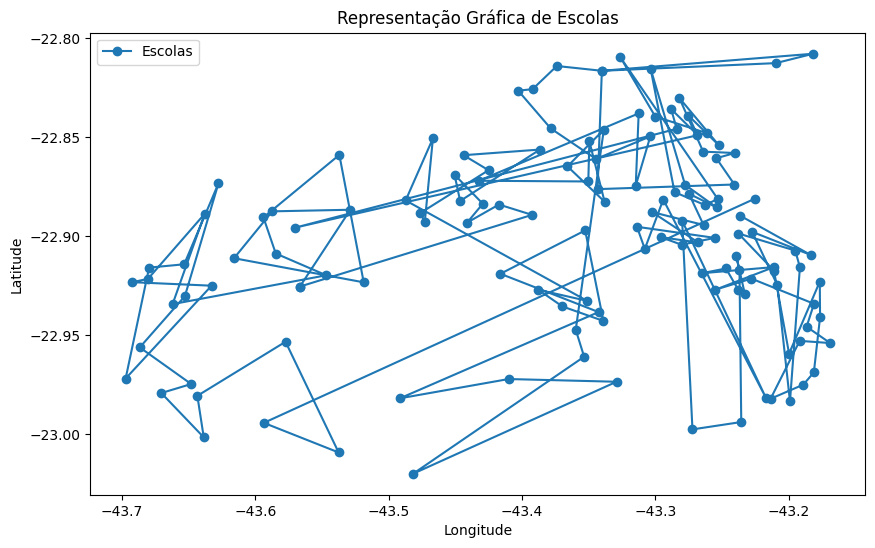

In [47]:
# Plotagem 
import matplotlib.pyplot as plt

dados_finais = pd.read_csv('dados_finais_ordenados.csv')

# Pontos de latitude e longitude da ordem natural
pontos_ordem_natural = dados_finais[['lat', 'lon']]

# pontos no plano cartesiano
plt.figure(figsize=(10, 6))
plt.plot(pontos_ordem_natural['lon'], pontos_ordem_natural['lat'], 'o-', label='Escolas')  # Todas as escolas

plt.title('Gráfico de Escolas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Exibir o gráfico
plt.show()
